Reuters Dataset (46 categories) : single-label,Multiclass Classification problem 

Step 1: loading dataset 

In [4]:
from keras.datasets import reuters
import numpy as np

In [5]:
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)
np.load = old
del(old)

In [9]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [10]:
test_labels[0]

3

In [11]:
len(train_data)

8982

In [12]:
len(test_data)

2246

2) Preparing data 

In [13]:
def vectorize_sequence(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results


In [18]:
x_train = vectorize_sequence(train_data) # categorical encoding
# one hot encoding
x_test = vectorize_sequence(test_data)

In [16]:
x_train.shape

(8982, 10000)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
# one hot encoded labels
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [21]:
one_hot_test_labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

3) Building Network 

in previous case we are only differntiating or classify 
between two classes but in this case we have more classes so 
there is a need of more hidden units to avoid information 
bottleneck 


In [22]:
from keras import layers 
from keras import models 

In [24]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

4)  compiling the model 

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',metrics=['accuracy'])


5) Seperate validation data 

In [30]:
# 1000 examples 
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


6) training model

In [32]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,
                   batch_size=512,validation_data=(x_val,y_val))


Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 509us/step - loss: 2.5526 - acc: 0.5249 - val_loss: 1.7377 - val_acc: 0.6360
Epoch 2/20
7982/7982 [==============================] - 2s 245us/step - loss: 1.4259 - acc: 0.7096 - val_loss: 1.3148 - val_acc: 0.7200
Epoch 3/20
7982/7982 [==============================] - 2s 245us/step - loss: 1.0573 - acc: 0.7806 - val_loss: 1.1504 - val_acc: 0.7500
Epoch 4/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.8312 - acc: 0.8261 - val_loss: 1.0593 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 2s 244us/step - loss: 0.6621 - acc: 0.8619 - val_loss: 0.9790 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 2s 240us/step - loss: 0.5281 - acc: 0.8906 - val_loss: 0.9407 - val_acc: 0.7900
Epoch 7/20
7982/7982 [==============================] - 2s 236us/step - loss: 0.4262 - a

In [33]:
history = history.history

In [34]:
print(history)

{'val_loss': [1.737709044456482, 1.3148456058502198, 1.1504352359771728, 1.0593194189071655, 0.9790371637344361, 0.9407461562156677, 0.9374972410202026, 0.8816292839050293, 0.9107928972244262, 0.8956130514144898, 0.9074408831596374, 0.9392469992637634, 0.9698712911605835, 0.9607767248153687, 0.9689536695480346, 0.961113293170929, 0.9860733375549317, 1.0257918968200683, 1.0173802070617677, 1.0601655349731445], 'val_acc': [0.6360000095367432, 0.7200000128746032, 0.7500000071525573, 0.7670000133514404, 0.7859999928474426, 0.7900000123977661, 0.7949999856948853, 0.8080000028610229, 0.8039999918937684, 0.8139999871253967, 0.8169999980926513, 0.8150000114440918, 0.8109999895095825, 0.8060000076293945, 0.8230000066757203, 0.8119999980926513, 0.8080000028610229, 0.8099999980926513, 0.8100000138282776, 0.7940000100135803], 'loss': [2.552587607067589, 1.4258859103199713, 1.0572537442730412, 0.8312082302597226, 0.6620997987245145, 0.5281241638816947, 0.4261790354713047, 0.3415625483820654, 0.2865

In [36]:
print(history['val_loss'])

[1.737709044456482, 1.3148456058502198, 1.1504352359771728, 1.0593194189071655, 0.9790371637344361, 0.9407461562156677, 0.9374972410202026, 0.8816292839050293, 0.9107928972244262, 0.8956130514144898, 0.9074408831596374, 0.9392469992637634, 0.9698712911605835, 0.9607767248153687, 0.9689536695480346, 0.961113293170929, 0.9860733375549317, 1.0257918968200683, 1.0173802070617677, 1.0601655349731445]


7) plotting traing and validation loss and accuracy 

In [37]:
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [45]:
val_loss = history['val_loss']
tra_loss = history['loss']
epochs = [i for i in range(1,len(val_loss)+1)] 

In [46]:
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [47]:
import matplotlib.pyplot as plt

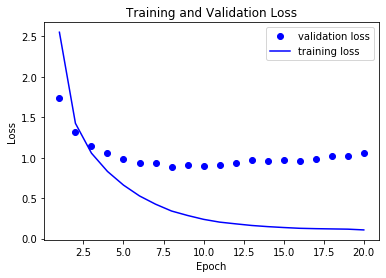

In [52]:
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.plot(epochs,tra_loss,'b',label='training loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
val_acc = history['val_acc']
tra_acc = history['acc']

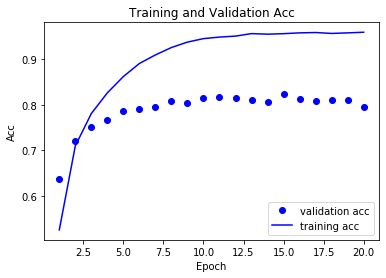

In [55]:
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.plot(epochs,tra_acc,'b',label='training acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

Analysis : After nine(9) epochs the model started to overfit so next we trained for 9 epochs and do the testing on test dataset.

In [56]:
model_1 = model
model_1.fit(partial_x_train,partial_y_train,epochs=9,
                   batch_size=512,validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.1054 - acc: 0.9582 - val_loss: 1.0770 - val_acc: 0.8030
Epoch 2/9
7982/7982 [==============================] - 2s 264us/step - loss: 0.1025 - acc: 0.9570 - val_loss: 1.1051 - val_acc: 0.8010
Epoch 3/9
7982/7982 [==============================] - 2s 294us/step - loss: 0.1044 - acc: 0.9584 - val_loss: 1.0768 - val_acc: 0.8100
Epoch 4/9
7982/7982 [==============================] - 2s 285us/step - loss: 0.1054 - acc: 0.9557 - val_loss: 1.0956 - val_acc: 0.8030
Epoch 5/9
7982/7982 [==============================] - 2s 267us/step - loss: 0.0986 - acc: 0.9577 - val_loss: 1.1220 - val_acc: 0.8060
Epoch 6/9
7982/7982 [==============================] - 2s 258us/step - loss: 0.1002 - acc: 0.9560 - val_loss: 1.1904 - val_acc: 0.7890
Epoch 7/9
7982/7982 [==============================] - 2s 252us/step - loss: 0.0985 - acc: 0.9575 - val_loss: 1.1320 - val_acc: 0.8060
Epoch 8

In [58]:
results = model_1.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 1s 251us/step


In [59]:
results

[1.338310194779801, 0.7836153161706185]

In [62]:
# thats pretty good on random we get around 19% accurcay 
import copy 
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = test_labels==test_labels_copy
float(np.sum(hits_array)/len(test_labels))

0.19857524487978628

Analyzing Prediction: 

In [63]:
predictions = model_1.predict(x_test)

In [64]:
predictions[0].shape

(46,)

In [65]:
np.sum(predictions[0])

1.0

In [68]:
np.argmax(predictions[0]) # predicted category 

3

A different way to handle label and loss

In [69]:
# integer tensors
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [71]:
y_train.shape

(8982,)

In [72]:
# so choice of loss function is changes as the output is integer categories
model_2 = model
model_2.compile(optimizer='rmsprop',loss= 'sparse_categorical_crossentropy',
               
               metrics=['acc'])

In [73]:
# same loss function as categorical_crossentropy but different interface

Now, analyze what happens when the hidden units have less units then number of outputs 

In [75]:
model_3 = models.Sequential()
model_3.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model_3.add(layers.Dense(4,activation='relu'))
model_3.add(layers.Dense(46,activation='softmax'))

In [76]:
model_3.compile(optimizer='rmsprop',loss= 'categorical_crossentropy',
               
               metrics=['acc'])

In [77]:
model_3.fit(partial_x_train,partial_y_train,epochs=20,
                   batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 386us/step - loss: 3.6234 - acc: 0.0443 - val_loss: 3.4140 - val_acc: 0.0460
Epoch 2/20
7982/7982 [==============================] - 2s 238us/step - loss: 3.2109 - acc: 0.2578 - val_loss: 3.0133 - val_acc: 0.4550
Epoch 3/20
7982/7982 [==============================] - 2s 243us/step - loss: 2.7479 - acc: 0.5048 - val_loss: 2.5900 - val_acc: 0.5130
Epoch 4/20
7982/7982 [==============================] - 2s 241us/step - loss: 2.3003 - acc: 0.5437 - val_loss: 2.2275 - val_acc: 0.5430
Epoch 5/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.9500 - acc: 0.5666 - val_loss: 1.9655 - val_acc: 0.5650
Epoch 6/20
7982/7982 [==============================] - 2s 236us/step - loss: 1.7210 - acc: 0.5836 - val_loss: 1.8172 - val_acc: 0.5710
Epoch 7/20
7982/7982 [==============================] - 2s 240us/step - loss: 1.5701 - acc: 0.5901 - val_loss: 1.7256 - val_acc: 0.5760


Both the training and validation accuracy drops sgnificantly due to information bottleneck so there is a lot of loss of information in intermediate layer that have 4 hidden units 

Final Summary :
* The units in hidden units must be larger than or equal to ouput categories
* In single-label, multiclass classification problem the end layer must be end with softmax activation function 
* categorical crossentropy is the choice among most of such multi-class classification problems
* There are two ways to handle labels: one is categorical or one-hot encoding where loss function is choosen as categorical_crossentropy and other is encoding labels as integers where loss is use as sparse_categorical_crossentropy
* if the ouput categories/labels increses you should increase the size of hidden layers